In [1]:
def main(test_type):
    import pandas as pd 
    import numpy as np 
    import matplotlib.pyplot as plt

    from sklearn.preprocessing import StandardScaler 
    from imblearn.over_sampling import SMOTE

    df = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
    df = df.replace('?', np.nan)
    df = df.astype(float)
    
    columns = df.columns

    from impyute.imputation.cs import em
    df = em(df)

    df.columns = columns

    test_list = ['Dx:Cancer', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
    test_list.remove(test_type)
    
    x = df.drop(test_list, axis = 1)
    y = df['Dx:Cancer']
    
    rs = SMOTE()
    x , y = rs.fit_resample(x, y)

    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/2, random_state = 0)
    
    from sklearn.preprocessing import StandardScaler
    sc_x = StandardScaler()
    x_train = sc_x.fit_transform(x_train)
    x_test = sc_x.transform(x_test)
    
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    classifier = classifier.fit(x_train, y_train)
    
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X=x_train, y=y_train, cv=10)

    
    r_probs = [0 for _ in range(len(y_test))]
    y_pred = classifier.predict_proba(x_test)
    y_pred = y_pred[:,1]
    
    y_pred_final = list()
    
    for i in y_pred:
        if i >= 0.90:
            y_pred_final.append(1)
        else:
            y_pred_final.append(0)
        
    from sklearn.metrics import recall_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_curve, roc_auc_score
    
    rc = recall_score(y_test, y_pred_final)
    cm = confusion_matrix(y_test, y_pred_final)
    r_auc = roc_auc_score(y_test, r_probs)
    rf_auc = roc_auc_score(y_test, y_pred)
    
    r_fpr,r_tpr,r_threshold = roc_curve(y_test, r_probs)
    rf_fpr,rf_tpr,rf_threshold = roc_curve(y_test, y_pred)
    
    
    plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
    plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
    
    # Title
    plt.title('ROC Plot')
    # Axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # Show legend
    plt.legend() # 
    # Show plot
    print('Recall score =',rc)
    plt.show()

/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/imputation/cs/em.py:48: RuntimeWarning: invalid value encountered in double_scalars
  delta = (col[x_i]-previous)/previous


Recall score = 0.9833333333333333


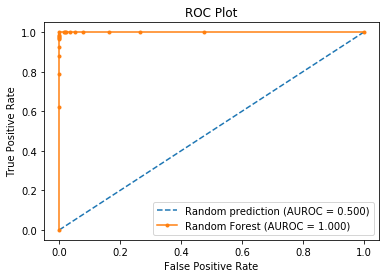

In [6]:
main('Hinselmann')

/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/imputation/cs/em.py:48: RuntimeWarning: invalid value encountered in double_scalars
  delta = (col[x_i]-previous)/previous


Recall score = 0.9738095238095238


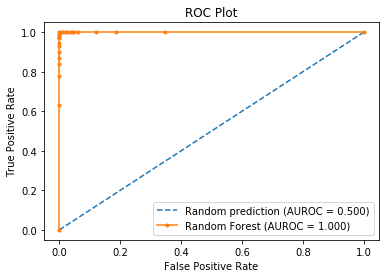

In [3]:
main('Schiller')

/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/imputation/cs/em.py:48: RuntimeWarning: invalid value encountered in double_scalars
  delta = (col[x_i]-previous)/previous


Recall score = 0.9857142857142858


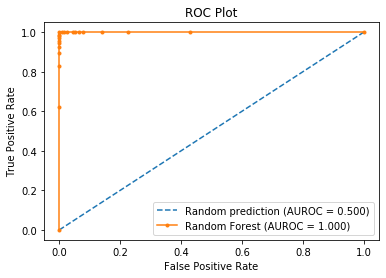

In [4]:
main('Biopsy')

/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
/home/idiosyncratic/anaconda3/lib/python3.7/site-packages/impyute/imputation/cs/em.py:48: RuntimeWarning: invalid value encountered in double_scalars
  delta = (col[x_i]-previous)/previous


Recall score = 0.9761904761904762


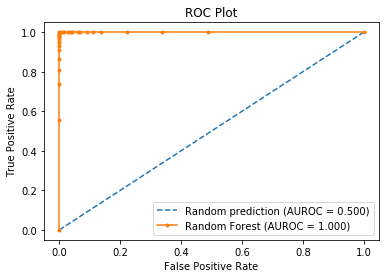

In [5]:
main('Citology')